# Make your First Quantum Circuit

This tutorial is the first step towards learning the features PennyLane provides. 

### Importing PennyLane and NumPy

First, we import PennyLane itself, as well as a wrapped version of *NumPy* which is provided via PennyLane. This allows us to use the familiar NumPy functions along with Quantum functions. 

In [1]:
import pennylane as qml
from pennylane import numpy as np

<div class="admonition important">

<div class="admonition-title">Important</div>

When constructing a hybrid quantum/classical computational model with PennyLane, it is important to always import NumPy from PennyLane, not the standard NumPy!

</div>

</div>

### Creating a Device

A **Quantum Circuit** comprises of quantum **operations** and **wires** that encode quantum bits that the operations can act on. 

> In PennyLane, the term quantum 'device' refers to a computational object that can apply quantum operations and return an expectation value. 

A device could be a hardware device (such as the IBM QX4, via the PennyLane-PQ plugin) or a software simulator (such as Strawberry Fields, via the PennyLane-SF plugin).

PennyLane supports two built-in devices for **discrete variable** and **continuous variable** quantum computation:

- [default.qubit]([default.qubit](../plugins.html#plugins)): pure state qubit simulator

- [default.gaussian](https://pennylane.readthedocs.io/en/latest/plugins/default_gaussian.html#module-pennylane.plugins.default_gaussian): Gaussian states simulator

Additional devices are supported through plugins — see [Plugins and ecosystem](https://pennylane.readthedocs.io/en/latest/plugins.html#plugins) for more details.

Let's use the qubit simulator device provided by PennyLane. Devices are loaded in PennyLane via the function [pennylane.device( )](https://pennylane.readthedocs.io/en/late/code/init.html#pennylane.device) 

In [2]:
dev = qml.device('default.qubit', wires = 1)

We call this function with:

- `name`: the name of the device to be loaded

- `wires`: the number of subsystems to initialize the device with

### Constructing a QNode

Now that we have initialized our device, we can begin to construct a [Quantum node](https://pennylane.readthedocs.io/en/latest/concepts/quantum_nodes.html) (or `QNode`)

> QNodes are an abstract encapsulation of a quantum function, described by a quantum circuit. QNodes are bound to a particular quantum device, which is used to evaluate expectation values of this circuit.

First, we need to define the quantum function that will be evaluated in the QNode:

In [3]:
# let's use PennyLane operator RX - Rotation about the X-axis by angle param
def circuit(param):
    qml.RX(param, wires=0)
    return qml.expval.PauliZ(0)

**NOTE:** the function `circuit()` is constructed as if it were any other Python function using Python notation (`def fn(...)`); it accepts a positional argument `param` which may be a list, a tuple or an array.

For a Python function to also be a valid quantum function, there are some important restrictions:

- Quantum functions must only contain quantum operations, one operation per line, in the order in which they are to be applied. For a full list of quantum operations, see [pennylane.ops](https://pennylane.readthedocs.io/en/latest/code/ops.html#module-pennylane.ops)

- Quantum functions must return either a single or a tuple of expectation values `expval`. As a result, the quantum function always returns a classical quantity, allowing the QNode to interface with other classical functions (and also other QNodes). For a full list of quantum expectation values, see [pennylane.expval](https://pennylane.readthedocs.io/en/latest/code/expval.html#module-pennylane.expval)

- Quantum functions must not contain any classical processing of circuit parameters.

Once we have written the quantum function, we convert it into a [QNode](https://pennylane.readthedocs.io/en/latest/code/qnode.html#pennylane.qnode.QNode) running on device `dev` by applying the [qnode decorator](https://pennylane.readthedocs.io/en/latest/code/decorator.html#module-pennylane.decorator) directly above the function definition:

In [4]:
@qml.qnode(dev)
def circuit(param):
    qml.RX(param, wires = 0)
    return qml.expval.PauliZ(0)

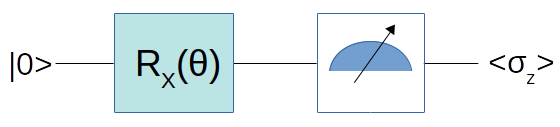

<div class="admonition note">

<div class="admonition-title">NOTE</div>

We use the `QNode` decorator to indicate that this is not a typical Python function. This prevents the function from being run as usual by the Python interpretor. Instead, the function is evaluated on the device `dev` (which may be quantum hardware).

</div>

</div>

Thus, our `circuit()` quantum function is now a `QNode`, which will run on device `dev` every time it is evaluated. To evaluate, we simply call the function with some appropriate numerical inputs:

In [5]:
circuit(np.pi)

-1.0

This makes sense since the qubit is intialized in $\mid0\rangle$ state. 

### Examples

Lets look at a couple of simple examples: 

In [6]:
# using default.qubit device with one subsystem
dev1 = qml.device('default.qubit', wires = 1)

@qml.qnode(dev1)
def qfunc1():
    return qml.expval.Identity(0)

In [7]:
qfunc1()

1.0

This makes sense as $\langle0\mid\hat{I}\mid0\rangle=1$ 

In [8]:
# using default.gaussian device with one subsystem
dev2 = qml.device('default.gaussian', wires = 1)

@qml.qnode(dev2)
def qfunc2():
    return qml.expval.MeanPhoton(0)

In [9]:
qfunc2()

0.0

This makes sense as the Gaussian state is initialized to the vaccum state (the lowest energy Gaussian state with no displacement or squeezing in phase space) that has zero number of Photons.

<div class="admonition attention">

<div class="admonition-title"> Final Notes</div>

1. Final measurements are considered as *expectation values* $\langle \cdots \rangle$  -- i.e., averages -- not single-shot results. Expectation values are deterministic, whereas single-shot measurements are stochastic. This is what allows us to do machine learning on the circuit (Note: the same principle holds for deep learning models).


2. Since circuits are meant to be run on quantum hardware, there is limited support for classical computation *inside* the circuit function. On the other hand, classical processing of circuit inputs/outputs is fully supported

</div>

</div>